# Boston House Price Prediction

# Strategy for price prediction

1.Find the attribute with maximum corelation with price
2.Split data into training and testing data
3.Choose linear regression model
4.Train model & arrive at m(slope/weight) and c(intercept/bias)
5.Predict price from the testing data


In [131]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from IPython.display import HTML


# the steps involved in solving a problem with machine learning techniques

1.Data Preprocessing
2.Define "Error"
3.Split the data into two parts:Training data and Testing data
4.Train the model:This step involves 'learning' the target function from the given training data.Choose the appropriate machine learning algorithm for the problem. train it on the data.Test the model with testing data.
5.Prediction: obtain the predicted values for the given input and vizualize the results


# Step 1:Data preprocessing 
Load the Dataset

1.Data acquition
2.Data preparation
3.Input Data
4.Processing
5.Output

In [91]:
#Load the Dataset
boston=load_boston()

#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [92]:
#put the data into pandas dataframe
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [93]:
features['AGE'][4]

54.2

In [94]:
features['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [95]:
features['ZN']

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64

In [96]:
features['INDUS']

0       2.31
1       7.07
2       7.07
3       2.18
4       2.18
       ...  
501    11.93
502    11.93
503    11.93
504    11.93
505    11.93
Name: INDUS, Length: 506, dtype: float64

In [97]:
target = pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [98]:
max(target['target'])

50.0

In [99]:
min(target['target'])

5.0

In [100]:
#concatenate the target and the features into a single dataframe
#axis =1 makes it concatenate columns wise

In [101]:
df=pd.concat([features,target],axis=1)

In [102]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# use describe() to generate the summary of the dataset

Describe() method computes the following parameters for each column

1.count:number of rows
2.Mean:mean of the column
3.Std:standard deviation of the column
4.Min:Minimum value of the column
5.Max:maximum value of the column
6.25%:25 percentile
7.50%:50 percentile
8.75%:75 percentile

Percentile:a percentile is a measure used in statistics indicating the value belowwhich is given
percentage of observations of a group of observation falls

In [103]:
# use round(decimals=2) to set the precision to 2 decimal places
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [104]:
l = ['hello','bye','good','evening','morning']

In [105]:
p=['priyanshu','gargi','afternoon','morning','evening']

In [106]:
zip(l,p)

In [107]:
list(zip(l,p))

[('hello', 'priyanshu'),
 ('bye', 'gargi'),
 ('good', 'afternoon'),
 ('evening', 'morning'),
 ('morning', 'evening')]

In [108]:
#calculate corelation between every cloumn of the data
corr=df.corr('pearson')
#take absolute values of corelation
corrs= [abs(corr[attr]['target']) for attr in list(features)]

In [109]:
corrs

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

In [110]:
l=list(zip(corrs,list(features)))
#l=list(zip(corrs,features)) ye bhi likh sakte hai

In [111]:
l

[(0.3883046085868114, 'CRIM'),
 (0.3604453424505447, 'ZN'),
 (0.483725160028373, 'INDUS'),
 (0.1752601771902975, 'CHAS'),
 (0.4273207723732817, 'NOX'),
 (0.6953599470715389, 'RM'),
 (0.3769545650045959, 'AGE'),
 (0.24992873408590394, 'DIS'),
 (0.3816262306397776, 'RAD'),
 (0.46853593356776646, 'TAX'),
 (0.507786685537561, 'PTRATIO'),
 (0.33346081965706653, 'B'),
 (0.7376627261740143, 'LSTAT')]

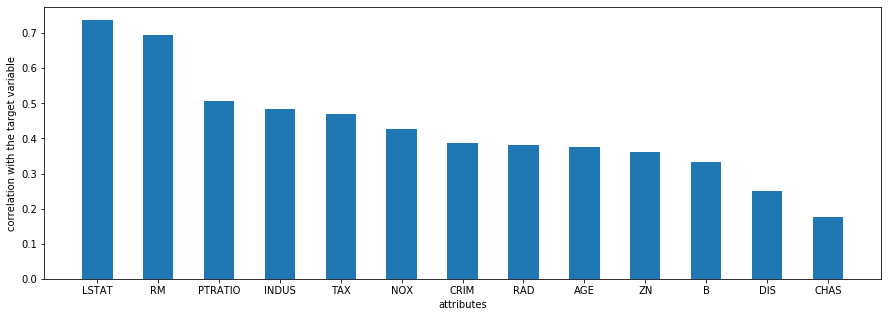

In [112]:
#sort the list of pairs in reverse/descending order
#with the corelation value as the key for sorting

# sorted(l,reverse=True) ye bhi likh sakte
l.sort(key= lambda x : x[0], reverse=True)

#unzip pairs to two lists
#zip(*l) - takes a list thst looks like [[a,b,c],[d,e,f],[g,h,i]]
#and returns [[a,d,g],[b,e,h],[c,e,i]]
corrs,labels = list(zip((*l)))

#plot corelations with respect to the target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs, width=0.5)
plt.xlabel('attributes')
plt.ylabel('correlation with the target variable')
plt.xticks(index,labels)
plt.show()

# we observe from the bar graph generated above , that LSTAT and RM have the two highest absolute corelation values

Normalize the data

Normalize the data with MinMaxScaler


In [113]:
X= df['LSTAT'].values
Y= df['target'].values


In [114]:
#before normaliztion
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [115]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:,-1]

In [116]:
#After normaliztion 
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


# Loss Function

Mean square error function
we have continous data so that's why we are using mean square error functions


In [132]:
# error_value =(1/n)*sum(np.power(X-Y,2))
# by the use of mean_squared_error function also we can calculate mean square error
error_value = mean_squared_error(Y,X)

In [134]:
print(error_value)

0.14751936169733662


# The three functions that constitute the model are

1. error: This function returns the mean squared error for the predicted values for given m & c
2. update: This function changes the values of m and c
3. gradient_descent: This function implements gradient descent

In [119]:
def error(m,x,c,t):
    N = x.size
    e = sum(((m*x+c)-t)**2)
    return e*1/(2*N)

# Split the Data

Split the data into training and testing data: The data is split before the training step and the samples in the sets of data
do not change during the course of the training process
Cross Validation: Split the data into equal chunks.At each step of training,choose one chunk of data as training data and other chunk as testing data

# Spliting data into fixed sets

In [120]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [124]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m = m - grad_m*learning_rate
    c = c - grad_c*learning_rate
    return m,c

In [125]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m ,x ,c ,t)
        if e < error_threshold:
            print('Error less then the threshold, Stopping gradient descent')
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

In [126]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m,c,error_values,mc_values = gradient_descent(init_m,init_c,xtrain, ytrain,learning_rate,iterations,error_threshold)


Wall time: 84.2 ms


In [ ]:
this is done to animate the values in the list

In [127]:
mc_values_anim = mc_values[0:250:5]

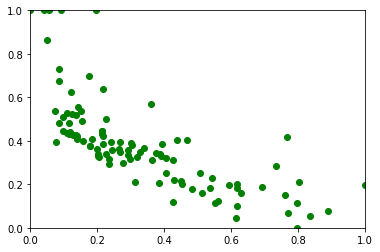

In [130]:
fig, ax = plt.subplots()
ln, = plt.plot([] , [], 'ro-',animated=True)


def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,

def update_frame(frame):
    m , c = mc_values_anim[frame]
    x1 , y1 = -0.5, m*-.5 + c
    x2 , y2 = 1.5 , m*1.5 + c
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim = FuncAnimation(fig,update_frame,frames=range(len(mc_values_anim)),init_func=init,blit=True)

# Vizualization of the learning process

1. PLot the regression line against the training data set to vizualizeb what the training line looks like for the training dataset .
2. pLot the error values: this graph will show you how the error drops overtime .
3. plot the change in regression line throuht the training process: This graph help you vizualize how how m and c values are update after each step

# Plotting the regression line upon the training dataset

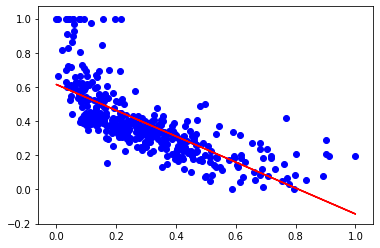

In [81]:
plt.scatter( ,ytrain,color='b')
plt.plot(xtrain,(m*xtrain+c),color='r')


# plotting error values

Text(0.5, 0, 'iterations')

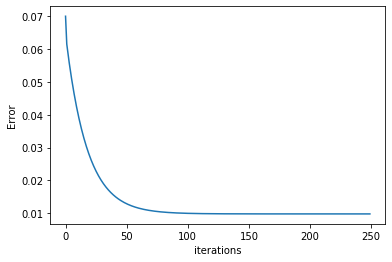

In [73]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('iterations')

# Step 5 : Prediction

After step 4, we obtain the final values of m and c . Using these values we obtain the predictions for the values inte testing data.

we will then evaluate the model with certain matrices such as , RMSE,R2 score etc.the choice of these metrices will depend on the type of data (Categorical ,continous etc) 

# Prediction

In [74]:
predicted= (m*xtest)+c

In [75]:
mean_squared_error(ytest,predicted)

0.01669440704158935

In [76]:
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.341060,0.342222,0.355737
1,0.406733,0.322222,0.305965
2,0.220199,0.482222,0.447334
3,0.216887,0.640000,0.449843
4,0.033940,1.000000,0.588493


# Plot the predicted values against te target values

1. Predicted values are represented by the red colored lines
2. Target values are represented by the blue colored points

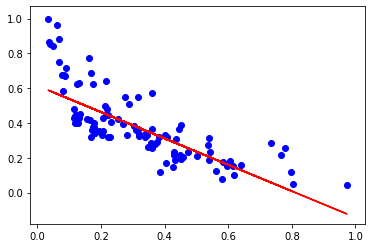

In [77]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')

# Revert normalization to obtain the predicted price of the houses in $1000s

The predicted values are in the range 0-1 this is not very usefull to us when we want to obtain the price .use inverse_transform() to scale the values back to original representation 

In [80]:
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,14.09,20.4,21.01
1,16.47,19.5,18.77
2,9.71,26.7,25.13
3,9.59,33.8,25.24
4,2.96,50.0,31.48
